# Plotly Visualization

## Setup

In [2]:
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pymysql

init_notebook_mode(connected=True)

In [3]:
DB_HOST = str(os.environ['DB_HOST'])
DB_PORT = int(os.environ['DB_PORT'])
DB_USER = str(os.environ['DB_USER'])
DB_PASSWORD = str(os.environ['DB_PASSWORD'])

In [4]:
def query_mysql_database(query):
    conn = pymysql.connect(user=DB_USER, passwd=DB_PASSWORD, host=DB_HOST, port=DB_PORT,
                           charset='utf8', local_infile=True)
    cur = conn.cursor()
    cur.execute(query)
    data = cur.fetchall()
    if cur.description is not None:
        column_names = [str(row[0]) for row in cur.description]
    else:
        column_names = None
    cur.close()
    conn.commit()
    conn.close()
    return(data, column_names)

In [5]:
query_mysql_database('SELECT * FROM net_worth_tracker.financial_assets LIMIT 10')

(((1, 1, 270, datetime.date(2019, 1, 1), 'Wells Fargo primary checking'),
  (2, 2, 550, datetime.date(2019, 1, 1), 'Ally emergency savings'),
  (3, 2, 210, datetime.date(2019, 1, 1), 'Marcus extra savings'),
  (4, 2, 770, datetime.date(2019, 1, 1), 'Cash'),
  (5, 3, 3800, datetime.date(2019, 1, 1), 'Bitcoin (1)'),
  (6, 3, 2940, datetime.date(2019, 1, 1), 'MAX stock'),
  (7, 4, 18480, datetime.date(2019, 1, 1), 'Colton Roth IRA'),
  (8, 4, 10670, datetime.date(2019, 1, 1), 'Danica Roth IRA'),
  (9, 4, 17920, datetime.date(2019, 1, 1), 'IPT 401K'),
  (10, 4, 560, datetime.date(2019, 1, 1), 'TVT 401K')),
 ['id', 'asset_type_id', 'value', 'value_date', 'description'])

## Load Data

In [6]:
FINANCIAL_ASSETS_QUERY = '''
SELECT a.asset_type_id, at.type, a.value_date, a.value, a.description
    FROM net_worth_tracker.financial_assets a
    JOIN net_worth_tracker.financial_asset_types at
        ON a.asset_type_id=at.id
'''

financial_assets_data = query_mysql_database(FINANCIAL_ASSETS_QUERY)
financial_assets_df = pd.DataFrame(data=financial_assets_data[0], columns=financial_assets_data[1])
print(financial_assets_df.shape)
financial_assets_df.head(5)

(1531, 5)


,asset_type_id,type,value_date,value,description
0,1,Checking,2019-01-01,270,Wells Fargo primary checking
1,1,Checking,2019-01-15,550,Wells Fargo primary checking
2,1,Checking,2019-02-01,500,Wells Fargo primary checking
3,1,Checking,2019-02-15,300,Wells Fargo primary checking
4,1,Checking,2019-03-01,590,Wells Fargo primary checking


## Visualization

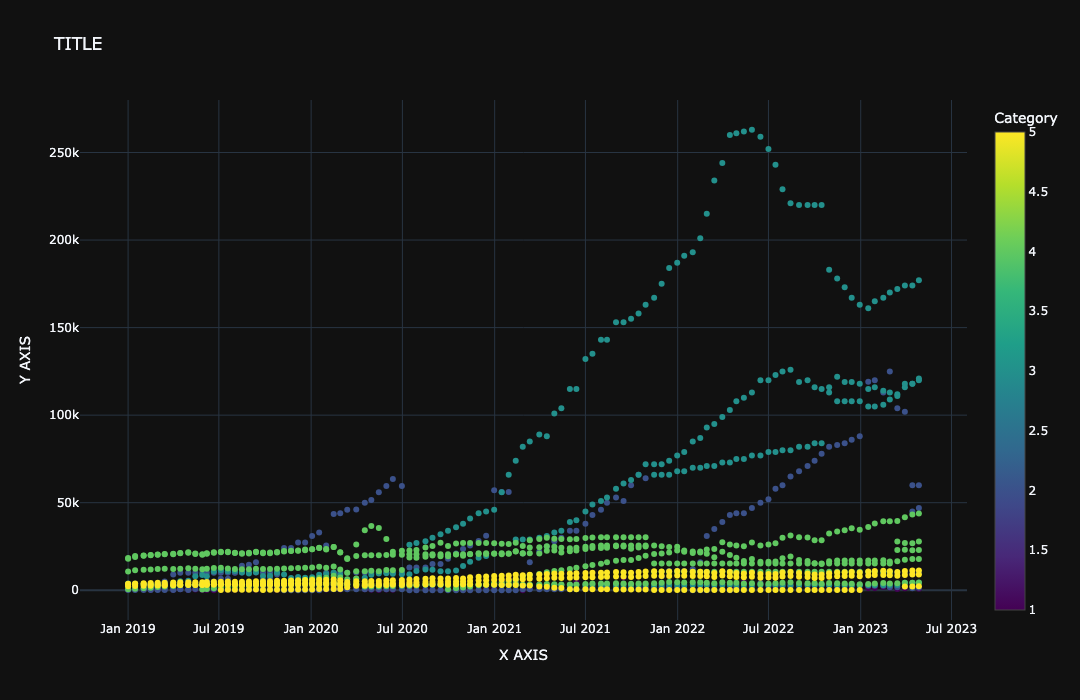

In [7]:
data = [
    go.Scatter(x=financial_assets_df['value_date'],
               y=financial_assets_df['value'],
               name='Examples',
               mode='markers',
               marker=dict(
                   color=list(financial_assets_df['asset_type_id']),
                   colorscale='Viridis',
                   colorbar=dict(
                       title='Category'
                   )
               ))
]

layout = go.Layout(title='TITLE',
                   xaxis=dict(title='X AXIS'),
                   yaxis=dict(title='Y AXIS'),
                   width=1100,
                   height=700,
                   template='plotly_dark')

fig = go.Figure(data=data, layout=layout)
iplot(fig)